# Neural Networks and Deep Learning Spring 1400 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Homework 2 - Question 3 - Part 1

### By Omid Vaheb

## Importing Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import seaborn as sns
import random as rnd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from google.colab import drive 
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading Dataset

In [38]:
dataframe = pd.read_csv('/content/drive/My Drive/house prices.csv')

# Preproccessing

In [39]:
size = dataframe.shape[0]
dataframe = dataframe.dropna(axis = 1, thresh = int(0.6 * size + 1))

In [40]:
dataframe["MasVnrType"] = dataframe["MasVnrType"].fillna('None')
dataframe["BsmtQual"] = dataframe["BsmtQual"].fillna('None')
dataframe["BsmtCond"] = dataframe["BsmtCond"].fillna('None')
dataframe["BsmtExposure"] = dataframe["BsmtExposure"].fillna('None')
dataframe["BsmtFinType1"] = dataframe["BsmtFinType1"].fillna('None')
dataframe["BsmtFinType2"] = dataframe["BsmtFinType2"].fillna('None')
dataframe["Electrical"] = dataframe["Electrical"].fillna('None')
dataframe["GarageType"] = dataframe["GarageType"].fillna('None')
dataframe["GarageFinish"] = dataframe["GarageFinish"].fillna('None')
dataframe["GarageQual"] = dataframe["GarageQual"].fillna('None')
dataframe["GarageCond"] = dataframe["GarageCond"].fillna('None')

In [41]:
label_encoder = LabelEncoder()
dataframe["MasVnrType"] = label_encoder.fit_transform(dataframe["MasVnrType"])
dataframe["BsmtQual"] = label_encoder.fit_transform(dataframe["BsmtQual"])
dataframe["BsmtCond"] = label_encoder.fit_transform(dataframe["BsmtCond"])
dataframe["BsmtExposure"] = label_encoder.fit_transform(dataframe["BsmtExposure"])
dataframe["BsmtFinType1"] = label_encoder.fit_transform(dataframe["BsmtFinType1"])
dataframe["BsmtFinType2"] = label_encoder.fit_transform(dataframe["BsmtFinType2"])
dataframe["Electrical"] = label_encoder.fit_transform(dataframe["Electrical"])
dataframe["GarageType"] = label_encoder.fit_transform(dataframe["GarageType"])
dataframe["GarageFinish"] = label_encoder.fit_transform(dataframe["GarageFinish"])
dataframe["GarageQual"] = label_encoder.fit_transform(dataframe["GarageQual"])
dataframe["GarageCond"] = label_encoder.fit_transform(dataframe["GarageCond"])
dataframe["LotFrontage"] = label_encoder.fit_transform(dataframe["LotFrontage"])
dataframe["MasVnrArea"] = label_encoder.fit_transform(dataframe["MasVnrArea"])
dataframe["GarageYrBlt"] = label_encoder.fit_transform(dataframe["GarageYrBlt"])

In [42]:
dataframe2 = pd.get_dummies(dataframe, drop_first = True)
dataframe2  = dataframe2.fillna(dataframe2.mean())

In [43]:
numerics = dataframe2.dtypes[dataframe2.dtypes != 'object'].index
dataframe2[numerics] = dataframe2[numerics].apply(lambda x: (x - x.mean()) / (x.std()))
dataframe2[numerics] = dataframe2[numerics].fillna(0)
dataframe2 = pd.get_dummies(dataframe2, dummy_na = True)

## Covariance Matrix

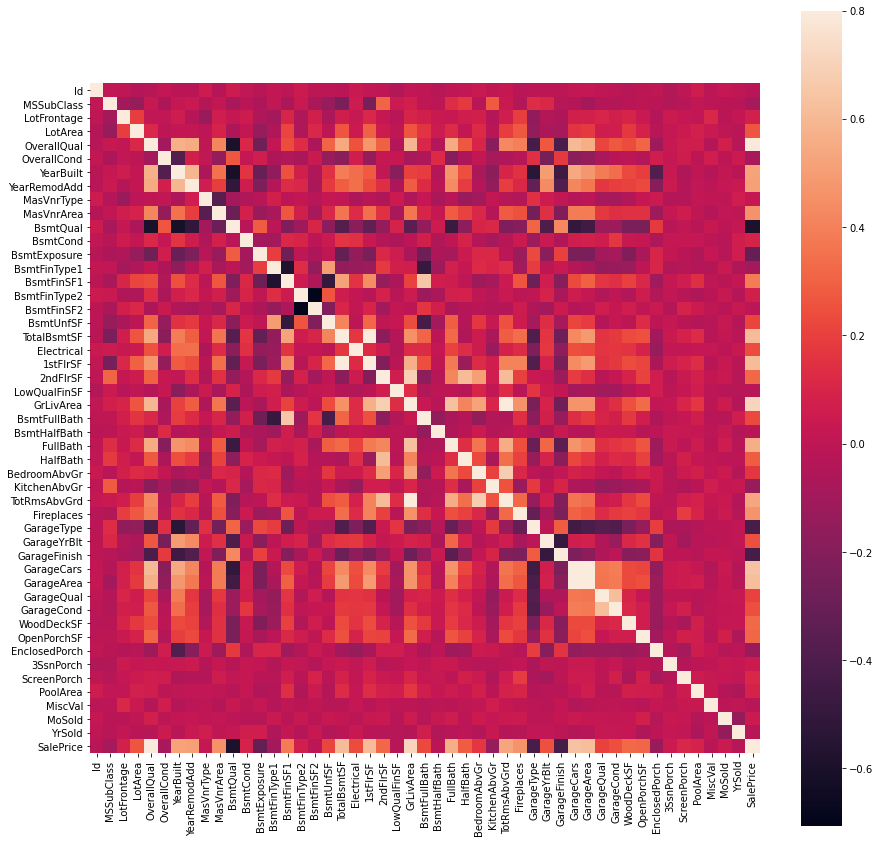

In [25]:
corrmat = dataframe.corr()
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(corrmat, vmax = .8, square = True);

## Finding Appropriate Fetaures Using Regression

<BarContainer object of 202 artists>

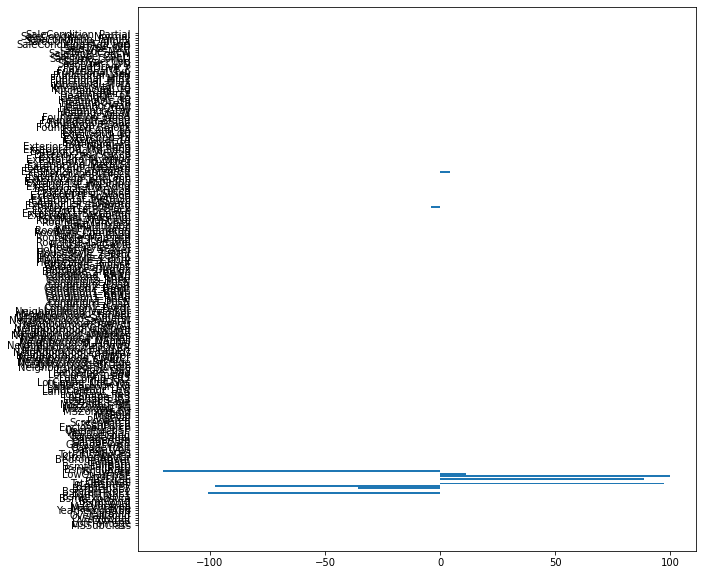

In [29]:
regressor = LinearRegression()
x = dataframe2.drop(['Id', 'SalePrice'], inplace = False, axis = 1)
y = dataframe2['SalePrice']
regressor.fit(x, y)
intercept = regressor.intercept_
features = pd.DataFrame(regressor.coef_, x.columns, columns = ['coefficient'])
features.head()
temp = []
for i in x.columns:
    temp.append(dataframe2[i].std())
features["stdev"] = np.array(temp).reshape(-1, 1)
features["importance"] = features["coefficient"] * features["stdev"]
features['importance_normalized'] = 100 * features['importance'] / features['importance'].max()
plt.figure(figsize = (10, 10))
plt.barh(features.index, features.importance_normalized)

## Finding Appropriate Fetaures Using Decision Tree

<BarContainer object of 202 artists>

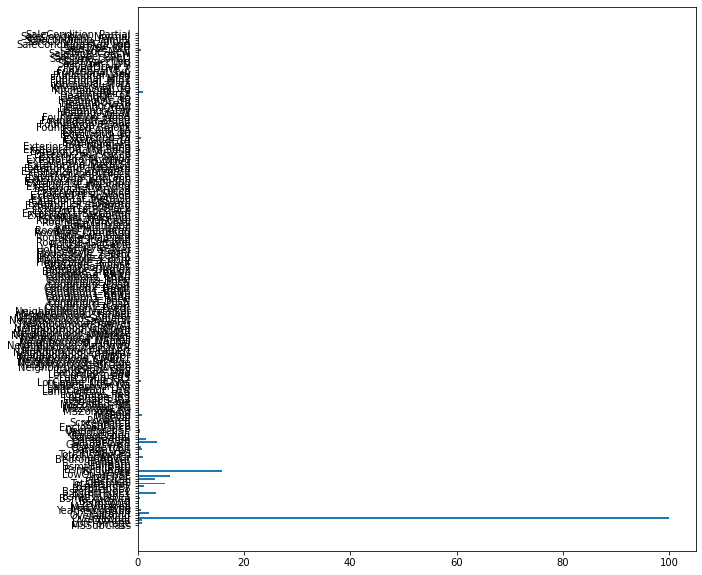

In [30]:
regressor_DT = DecisionTreeRegressor()
x = dataframe2.drop(['Id', 'SalePrice'], inplace = False, axis = 1)
y = dataframe2['SalePrice']
regressor_DT.fit(x, y)
features = pd.DataFrame(regressor_DT.feature_importances_, x.columns, columns = ['coefficient'])
features.head()
temp = []
for i in x.columns:
    temp.append(dataframe2[i].std())

features["stdev"] = np.array(temp).reshape(-1, 1)
features["importance"] = features["coefficient"] * features["stdev"]
features['importance_normalized'] = 100 * features['importance'] / features['importance'].max()
plt.figure(figsize = (10, 10))
plt.barh(features.index, features.importance_normalized)

## Train and Test Split

In [104]:
y = dataframe2['SalePrice']
X = dataframe2.drop(['Id', 'SalePrice'], inplace = False, axis = 1)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [107]:
X_train = np.append(arr = np.ones([X_train.shape[0], 1]).astype(int), values = X_train, axis = 1)
X_test = np.append(arr = np.ones([X_test.shape[0], 1]).astype(int), values = X_test, axis = 1)

In [108]:
X_opt = [x for x in range(203)]
regressor_OLS = sm.OLS(y_train, X_train[:, X_opt]).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     71.09
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:54:38   Log-Likelihood:                -70.294
No. Observations:                1168   AIC:                             536.6
Df Residuals:                     970   BIC:                             1539.
Df Model:                         197                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0161      0.008      1.903      0.0

In [109]:
X_opt = [3,4,5,6,8,9,10,11,12,14,17,18,20,21,23,28,29,30,31,36,43,44,46,48,50,51,52,56,58,59,60,61,79,80,81,87,91,94,95,101,102,110,121,122,123,124,125,126,127,158,159,165,168,172,179,180,181,183,184,187,191,192,195,201]
regressor_OLS = sm.OLS(y_train, X_train[:, X_opt]).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:54:38   Log-Likelihood:                -203.40
No. Observations:                1168   AIC:                             534.8
Df Residuals:                    1104   BIC:                             858.8
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0756      0.014      5.457      0.0

In [110]:
X_opt = [3,4,5,6,8,9,10,11,12,14,17,18,20,21,23,28,29,30,31,36,43,44,46,48,50,51,52,56,58,59,60,61,79,80,81,87,91,94,95,101,102,110,121,122,123,124,125,126,127,158,159,165,168,172,179,180,181,183,184,187,191,192,195,201]
to_remove = [8,11,15,23,26,30,39,41,53,62]
counter = 0
for i in to_remove:
    del X_opt[i - counter - 1]
    counter += 1
regressor_OLS = sm.OLS(y_train, X_train[:, X_opt]).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     232.7
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:54:38   Log-Likelihood:                -213.93
No. Observations:                1168   AIC:                             535.9
Df Residuals:                    1114   BIC:                             809.3
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0760      0.014      5.474      0.0

In [111]:
X_opt = [3,4,5,6,8,9,10,11,12,14,17,18,20,21,23,28,29,30,31,36,43,44,46,48,50,51,52,56,58,59,60,61,79,80,81,87,91,94,95,101,102,110,121,122,123,124,125,126,127,158,159,165,168,172,179,180,181,183,184,187,191,192,195,201]
to_remove = [8,11,15,23,26,30,39,41,53,62]
counter = 0
for i in to_remove:
    del X_opt[i - counter - 1]
    counter += 1
print(len(X_opt))
to_remove2 = [26,49,50]
counter = 0
for i in to_remove2:
    del X_opt[i - counter - 1]
    counter += 1

regressor_OLS = sm.OLS(y_train, X_train[:, X_opt]).fit()
print(regressor_OLS.summary())

54
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     245.5
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:54:38   Log-Likelihood:                -217.95
No. Observations:                1168   AIC:                             537.9
Df Residuals:                    1117   BIC:                             796.1
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0749      0.014      5.401      

In [145]:
model = Sequential([Dense(30, activation = 'relu', input_shape = (51,)),
                    Dense(10, activation = 'relu'),
                    Dense(1, kernel_initializer = 'normal')])
model.summary()

model.compile(loss = 'mean_squared_error', optimizer = 'adam',  metrics = ['mse'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 30)                1560      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 1,881
Trainable params: 1,881
Non-trainable params: 0
_________________________________________________________________


In [146]:
history = (model.fit(X_train[:, X_opt], y_train, batch_size = 32, epochs = 20, validation_split = 0.2)).history

Epoch 1/20
30/30 [==============================] - 1s 7ms/step - loss: 1.1083 - mse: 1.1083 - val_loss: 0.6685 - val_mse: 0.6685
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.7149 - mse: 0.7149 - val_loss: 0.3615 - val_mse: 0.3615
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.2823 - mse: 0.2823 - val_loss: 0.2164 - val_mse: 0.2164
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.2373 - mse: 0.2373 - val_loss: 0.1597 - val_mse: 0.1597
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1356 - val_mse: 0.1356
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.1165 - mse: 0.1165 - val_loss: 0.1240 - val_mse: 0.1240
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0985 - mse: 0.0985 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 8/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0786 - mse: 0.07

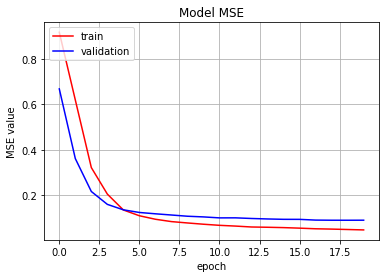

In [147]:
fig = plt.figure()
plt.plot(history['loss'], 'r')
plt.plot(history['val_loss'], 'b')
plt.title('Model MSE')
plt.ylabel('MSE value')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.grid()

In [148]:
y_pred = model.predict(X_test[:, X_opt])
test_loss = model.evaluate(X_test[:, X_opt], y_test)
print("Test Loss", test_loss[0])

10/10 [==============================] - 0s 1ms/step - loss: 0.6095 - mse: 0.6095
Test Loss 0.6094815731048584


Text(0, 0.5, 'Predicted')

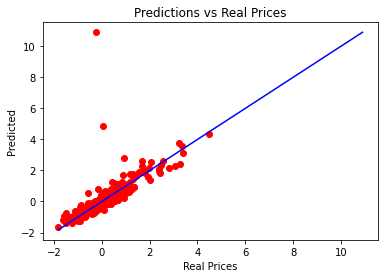

In [150]:
y_pred = model.predict(X_test[:, X_opt])
y_test2 = y_test.to_list()
y_pred2 = y_pred.tolist()
all = []
for i in y_pred2:
    for j in i:
        all.append(j)
p1 = max(max(all), max(y_test2))
p2 = min(min(all), min(y_test2))
fig = plt.figure()
plt.scatter(y_test2, all, c = 'r')
plt.plot([p1, p2], [p1, p2], 'b')
plt.title('Predictions vs Real Prices')
plt.xlabel('Real Prices')
plt.ylabel('Predicted')